In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
airline      = pd.read_csv('airline.csv')
day_schedule = pd.read_csv('day_schedule.csv')
group        = pd.read_csv('group.csv')
order        = pd.read_csv('order.csv')
training     = pd.read_csv('training-set.csv')
testing     = pd.read_csv('testing-set.csv')

In [3]:
airline.head()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [4]:
day_schedule.head(10)

,group_id,day,title
0,63695,1.0,台北 [AIR]歐胡島市區觀光【州政府．皇宮．國王銅像．中國城】
1,63695,2.0,夏威夷小環島【鑽石頭山．恐龍灣．噴泉口】－珍珠港[BOATS]豪華愛之船Star of Ho...
2,63695,3.0,夏威夷 [AIR] 舊金山
3,63695,4.0,舊金山市區觀光【藝術宮．金門大橋．金門公園．漁人碼頭．金門灣遊船．市政廳．雙子峰．九曲花街】
4,63695,5.0,舊金山－300KM－優勝美地國家公園－100KM－佛雷斯諾
5,63695,6.0,佛雷斯諾－380KM－巴斯托《名牌大賣場》－260KM－拉斯維加斯
6,63695,7.0,拉斯維加斯－200KM－大峽谷【西峽「天空步道」一日遊】－200KM－拉斯維加斯
7,63695,8.0,拉斯維加斯─450KM─洛杉磯市區觀光【中國戲院．星光大道．好萊塢杜比戲院 Dolby Th...
8,63695,9.0,洛杉磯190KM－聖地牙哥【海景火車－[BOATS]聖地牙哥港灣遊船－舊城區】
9,63695,10.0,洛杉磯【環球影城製片廠(哈利波特主題樂園)】


In [5]:
group.head()

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12,22-Mar-17,106900,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
1,53481,subline_value_1,area_value_1,12,17-May-17,112900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
2,54305,subline_value_1,area_value_1,12,21-Jun-17,115900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
3,41766,subline_value_1,area_value_1,12,12-Jul-17,126900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
4,32196,subline_value_1,area_value_1,12,9-Aug-17,126900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...


In [6]:
order.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1


In [7]:
train = pd.merge(order, training, on='order_id', how='inner') 
test  = pd.merge(order, testing, on='order_id', how='inner') 
data  = pd.concat([train,test])
data  = pd.merge(data, group, on = 'group_id', how = 'left')

In [8]:
len(data)

297020

In [9]:
train = data[data['deal_or_not'].notnull()]
test  = data[data['deal_or_not'].isnull()]
target = train['deal_or_not']

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(train, target, test_size = 0.2, random_state = 42)   #0.2當作驗證

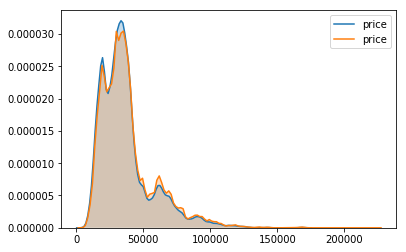

In [11]:
sns.kdeplot(train.loc[train['deal_or_not'] == 1, 'price'], shade = True)
sns.kdeplot(train.loc[train['deal_or_not'] == 0, 'price'], shade = True)

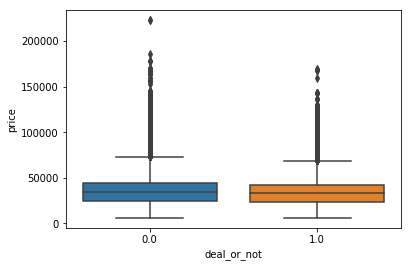

In [12]:
sns.boxplot(data= data, x ='deal_or_not', y = 'price')

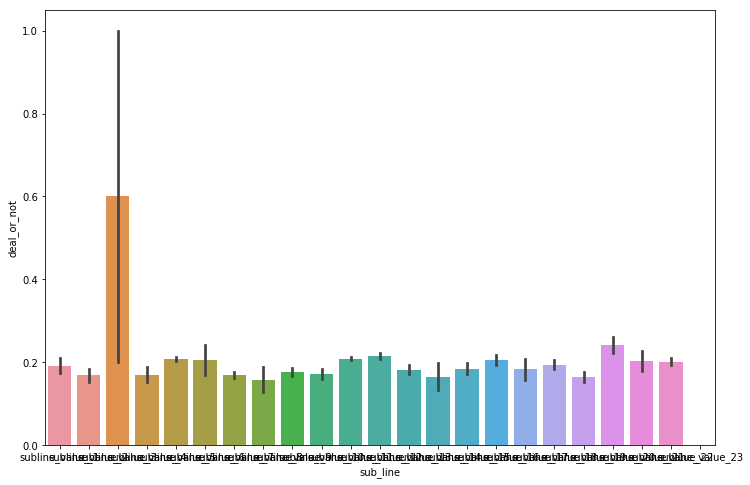

In [13]:
plt.figure(figsize=(12,8))
g = sns.barplot(x = 'sub_line', y = 'deal_or_not', data = data)

In [14]:
len(data[data['sub_line'] == 'subline_value_3'])

7

In [15]:
airline.head()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [16]:
airline_group = airline.groupby(['group_id']).sum()

In [17]:
airline_group.go_back.unique()

array(['去程回程', '去程去程回程回程', '去程去程去程回程回程回程', '去程回程回程', '去程去程', '去程去程回程',
       '去程去程去程去程', '去程去程去程回程回程', '去程去程回程回程回程', '回程去程', '去程去程去程回程',
       '去程去程回程回程去程回程', '去程去程去程回程回程回程回程', '去程回程去程回程', '去程', '去程回程去程去程回程回程'],
      dtype=object)

In [18]:
Go_Transfer_map = {
    '去程回程' : 0,
    '去程去程回程回程' : 1,
    '去程去程去程回程回程回程' : 2, 
    '去程回程回程' : 0,
    '去程去程' : 0, 
    '去程去程回程' : 1,
    '去程去程去程去程' : 1,
    '去程去程去程回程回程' : 2,
    '去程去程回程回程回程' : 1,
    '回程去程' : 0,
    '去程去程去程回程' : 1,
    '去程去程回程回程去程回程': 1,
    '去程去程去程回程回程回程回程' : 2,
    '去程回程去程回程' : 1,
    '去程' : 1,
    '去程回程去程去程回程回程': 1
}
Back_Transfer_map = {
    '去程回程' : 0,
    '去程去程回程回程' : 1,
    '去程去程去程回程回程回程' : 2, 
    '去程回程回程' : 1,
    '去程去程' : 0, 
    '去程去程回程' : 0,
    '去程去程去程去程' : 1,
    '去程去程去程回程回程' : 1,
    '去程去程回程回程回程' : 2,
    '回程去程' : 0,
    '去程去程去程回程' : 1,
    '去程去程回程回程去程回程': 1,
    '去程去程去程回程回程回程回程' : 3,
    '去程回程去程回程' : 1,
    '去程' : 1,
    '去程回程去程去程回程回程': 1
}

In [19]:
airline_group['Go_Transfer_map'] = airline_group['go_back'].map(Go_Transfer_map)
airline_group['Back_Transfer_map'] = airline_group['go_back'].map(Back_Transfer_map)

In [20]:
airline_group.reset_index(level=0, inplace=True)

In [21]:
airline_group[airline_group['go_back'] == '去程回程回程']

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport,Go_Transfer_map,Back_Transfer_map
414,801,去程回程回程,2017/5/22 00:252017/6/1 16:552017/6/1 23:50,HKG 香港機場CPH 哥本哈根凱斯楚普機場HEL 赫爾辛基機場,2017/5/22 06:002017/6/1 19:252017/6/2 14:30,HEL 赫爾辛基機場HEL 赫爾辛基機場HKG 香港機場,0,1
2276,4359,去程回程回程,2017/5/29 00:252017/6/8 16:552017/6/8 23:50,HKG 香港機場CPH 哥本哈根凱斯楚普機場HEL 赫爾辛基機場,2017/5/29 06:002017/6/8 19:252017/6/9 14:30,HEL 赫爾辛基機場HEL 赫爾辛基機場HKG 香港機場,0,1
2369,4526,去程回程回程,2017/5/19 17:502017/5/26 08:302017/5/26 14:15,TPE 桃園機場CKG 重慶江北機場PVG 上海浦東機場,2017/5/19 20:302017/5/26 10:502017/5/26 16:10,WUH 武漢天河機場PVG 上海浦東機場TPE 桃園機場,0,1
2541,4848,去程回程回程,2017/3/24 17:502017/3/31 08:202017/3/31 14:40,TPE 桃園機場CKG 重慶江北機場PVG 上海浦東機場,2017/3/24 20:302017/3/31 10:502017/3/31 16:35,WUH 武漢天河機場PVG 上海浦東機場TPE 桃園機場,0,1
2600,4950,去程回程回程,2017/3/31 19:352017/4/7 08:202017/4/7 14:40,TPE 桃園機場CKG 重慶江北機場PVG 上海浦東機場,2017/3/31 22:302017/4/7 10:502017/4/7 16:35,WUH 武漢天河機場PVG 上海浦東機場TPE 桃園機場,0,1
4210,8132,去程回程回程,2017/3/27 21:502017/4/4 20:052017/4/5 01:45,TPE 桃園機場LJU 盧布爾雅那機場IST 伊斯坦堡阿塔圖克機場,2017/3/28 05:102017/4/5 23:202017/4/5 18:00,IST 伊斯坦堡阿塔圖克機場IST 伊斯坦堡阿塔圖克機場TPE 桃園機場,0,1
4882,9488,去程回程回程,2017/5/2 00:252017/5/12 16:552017/5/12 23:50,HKG 香港機場CPH 哥本哈根凱斯楚普機場HEL 赫爾辛基機場,2017/5/2 06:002017/5/12 19:252017/5/13 14:30,HEL 赫爾辛基機場HEL 赫爾辛基機場HKG 香港機場,0,1
5621,10969,去程回程回程,2017/4/28 19:352017/5/5 08:202017/5/5 14:40,TPE 桃園機場CKG 重慶江北機場PVG 上海浦東機場,2017/4/28 22:302017/5/5 10:502017/5/5 16:35,WUH 武漢天河機場PVG 上海浦東機場TPE 桃園機場,0,1
6240,12198,去程回程回程,2017/10/10 23:402017/10/18 19:152017/10/19 15:10,TPE 桃園機場VIE 維也納機場BKK 曼谷蘇凡納布機場,2017/10/11 09:502017/10/19 17:052017/10/19 20:05,VIE 維也納機場TPE 桃園機場TPE 桃園機場,0,1
6440,12575,去程回程回程,2017/10/24 15:402017/10/29 07:102017/10/29 10:25,TPE 桃園機場DYG 張家界機場SZX 深圳寶安機場,2017/10/24 18:202017/10/29 08:452017/10/29 12:15,DYG 張家界機場SZX 深圳寶安機場TPE 桃園機場,0,1


In [22]:
data['sub_line'].head()

0    subline_value_1
1    subline_value_1
2    subline_value_1
3    subline_value_1
4    subline_value_1
Name: sub_line, dtype: object

In [23]:
airline.fly_time[4] > airline.fly_time[3]

True

In [24]:
airline.fly_time.head()

0    2017/3/22 23:30
1     2017/4/1 14:30
2    2017/5/17 23:00
3    2017/5/27 16:00
4    2017/6/21 23:30
Name: fly_time, dtype: object

In [25]:
airline['time_interval1'] = airline.fly_time.apply(lambda x : x.split(' ')[1])   # 起飛時間
airline['time_interval2'] = airline.arrive_time.apply(lambda x : x.split(' ')[1])   #降落時間

In [26]:
airline['take_off_time'] = airline['time_interval1'].apply(lambda x : 'morning' if '14:00'> x >'05:59' else 'afternoon' if '13:59' < x < '22:00' else 'night')
airline['land_time'] = airline['time_interval2'].apply(lambda x : 'morning' if '14:00'> x >'05:59' else 'afternoon' if '13:59' < x < '22:00' else 'night')

In [27]:
train = pd.merge(train, airline, on = 'group_id', how = 'left')

In [28]:
train.loc[train['take_off_time'].isna(),['take_off_time','group_id']]

,take_off_time,group_id
290,NaN,11658
291,NaN,11658
292,NaN,11658
293,NaN,11658
294,NaN,11658
295,NaN,11658
296,NaN,11658
297,NaN,11658
298,NaN,11658
299,NaN,11658


In [29]:
airline.loc[airline['group_id'] == 11658]

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport,time_interval1,time_interval2,take_off_time,land_time


take_off_time  land_time
afternoon      afternoon    0.203252
               morning      0.161430
               night        0.205476
morning        afternoon    0.200931
               morning      0.197190
               night        0.176928
night          afternoon    0.201471
               morning      0.179194
               night        0.190507
Name: deal_or_not, dtype: float64

<Figure size 2160x1152 with 0 Axes>

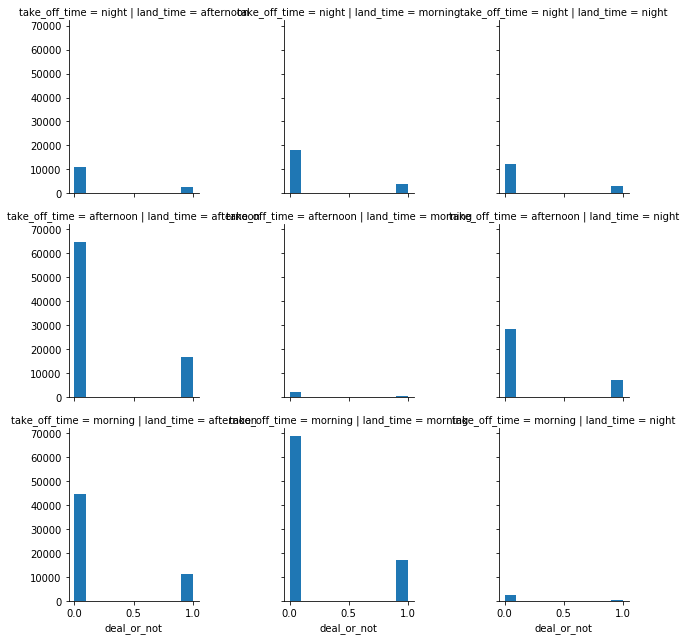

In [30]:
plt.figure(figsize=(30,16))
g = sns.FacetGrid(data = train, row = 'take_off_time', col = 'land_time')
g.map(plt.hist, 'deal_or_not')
train.groupby(['take_off_time','land_time'])['deal_or_not'].mean()

In [31]:
data['area'].head()

0    area_value_1
1    area_value_1
2    area_value_1
3    area_value_1
4    area_value_1
Name: area, dtype: object

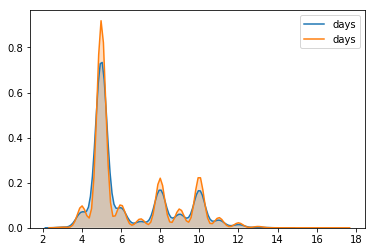

In [32]:
sns.kdeplot(data.loc[data['deal_or_not'] == 1, 'days'], shade = True)
sns.kdeplot(data.loc[data['deal_or_not'] == 0, 'days'], shade = True)

days
2          1
3        730
4      16199
5     153039
6      18300
7       6583
8      35813
9      13326
10     41169
11      7496
12      3315
13       896
14       122
16        30
17         1
Name: days, dtype: int64

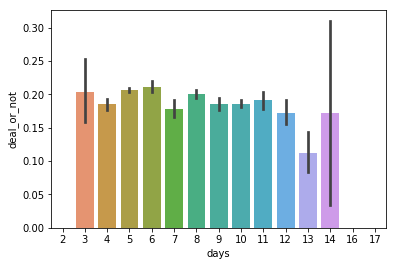

In [33]:
g = sns.barplot(x = 'days', y = 'deal_or_not', data= data)
data.groupby(['days'])['days'].count()

In [34]:
data[(data.group_id == 4540) | (data.group_id == 24914) | (data.group_id == 39626) | (data.group_id == 63034) | (data.group_id == 63882)]

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,deal_or_not,sub_line,area,days,begin_date,price,product_name,promotion_prog
41643,207751,63034,11-Apr-17,src1_value_1,src2_value_1,unit_value_16,6,0.0,subline_value_10,area_value_67,11,2-Jul-17,71900,超值西班牙～馬德里．巴塞隆納．高第建築、當地美食、佛朗明哥舞11日(雙點進出、巴塞隆納住2晚),NaN
280822,331686,63882,6-Jul-17,src1_value_2,src2_value_1,unit_value_6,2,NaN,subline_value_18,area_value_115,5,10-Nov-17,32800,馬泰五日遊(檳檳),NaN


In [35]:
data[data['sub_line'].isnull()]

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,deal_or_not,sub_line,area,days,begin_date,price,product_name,promotion_prog


In [36]:
train['deal_or_not'].value_counts()

0.0    253121
1.0     62611
Name: deal_or_not, dtype: int64

In [37]:
group.head(100)

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,63695,subline_value_1,area_value_1,12,22-Mar-17,106900,最高省8000》大美西～夏威夷、優勝美地、西峽天空步道、聖地牙哥、環球影城(哈利波特)12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
1,53481,subline_value_1,area_value_1,12,17-May-17,112900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
2,54305,subline_value_1,area_value_1,12,21-Jun-17,115900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
3,41766,subline_value_1,area_value_1,12,12-Jul-17,126900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
4,32196,subline_value_1,area_value_1,12,9-Aug-17,126900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
5,25423,subline_value_1,area_value_1,12,27-Sep-17,116900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
6,25705,subline_value_1,area_value_1,12,13-Dec-17,116900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
7,44047,subline_value_1,area_value_1,12,22-Nov-17,116900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
8,21406,subline_value_1,area_value_1,12,11-Oct-17,116900,《玩樂369》旗艦大美西12日～升等五星、優勝美地、西峽天空步道、卡利哥鬼鎮、環球影城大美西12日,&lt;B&gt;[GG]《行銷活動》[//]&lt;/B&gt;&lt;font face...
9,63785,subline_value_1,area_value_2,10,7-Jan-17,70900,《加999升等豪經艙》驚奇美西～大峽谷天空步道、賭城摩天輪、美食饗宴、環球影城、迪士尼10日,"&lt;font face=""微軟正黑體"" size=""2""&gt;[GG]&lt;b&gt..."


In [38]:
train['price_interval'] = pd.cut(train['price'], bins= 6)

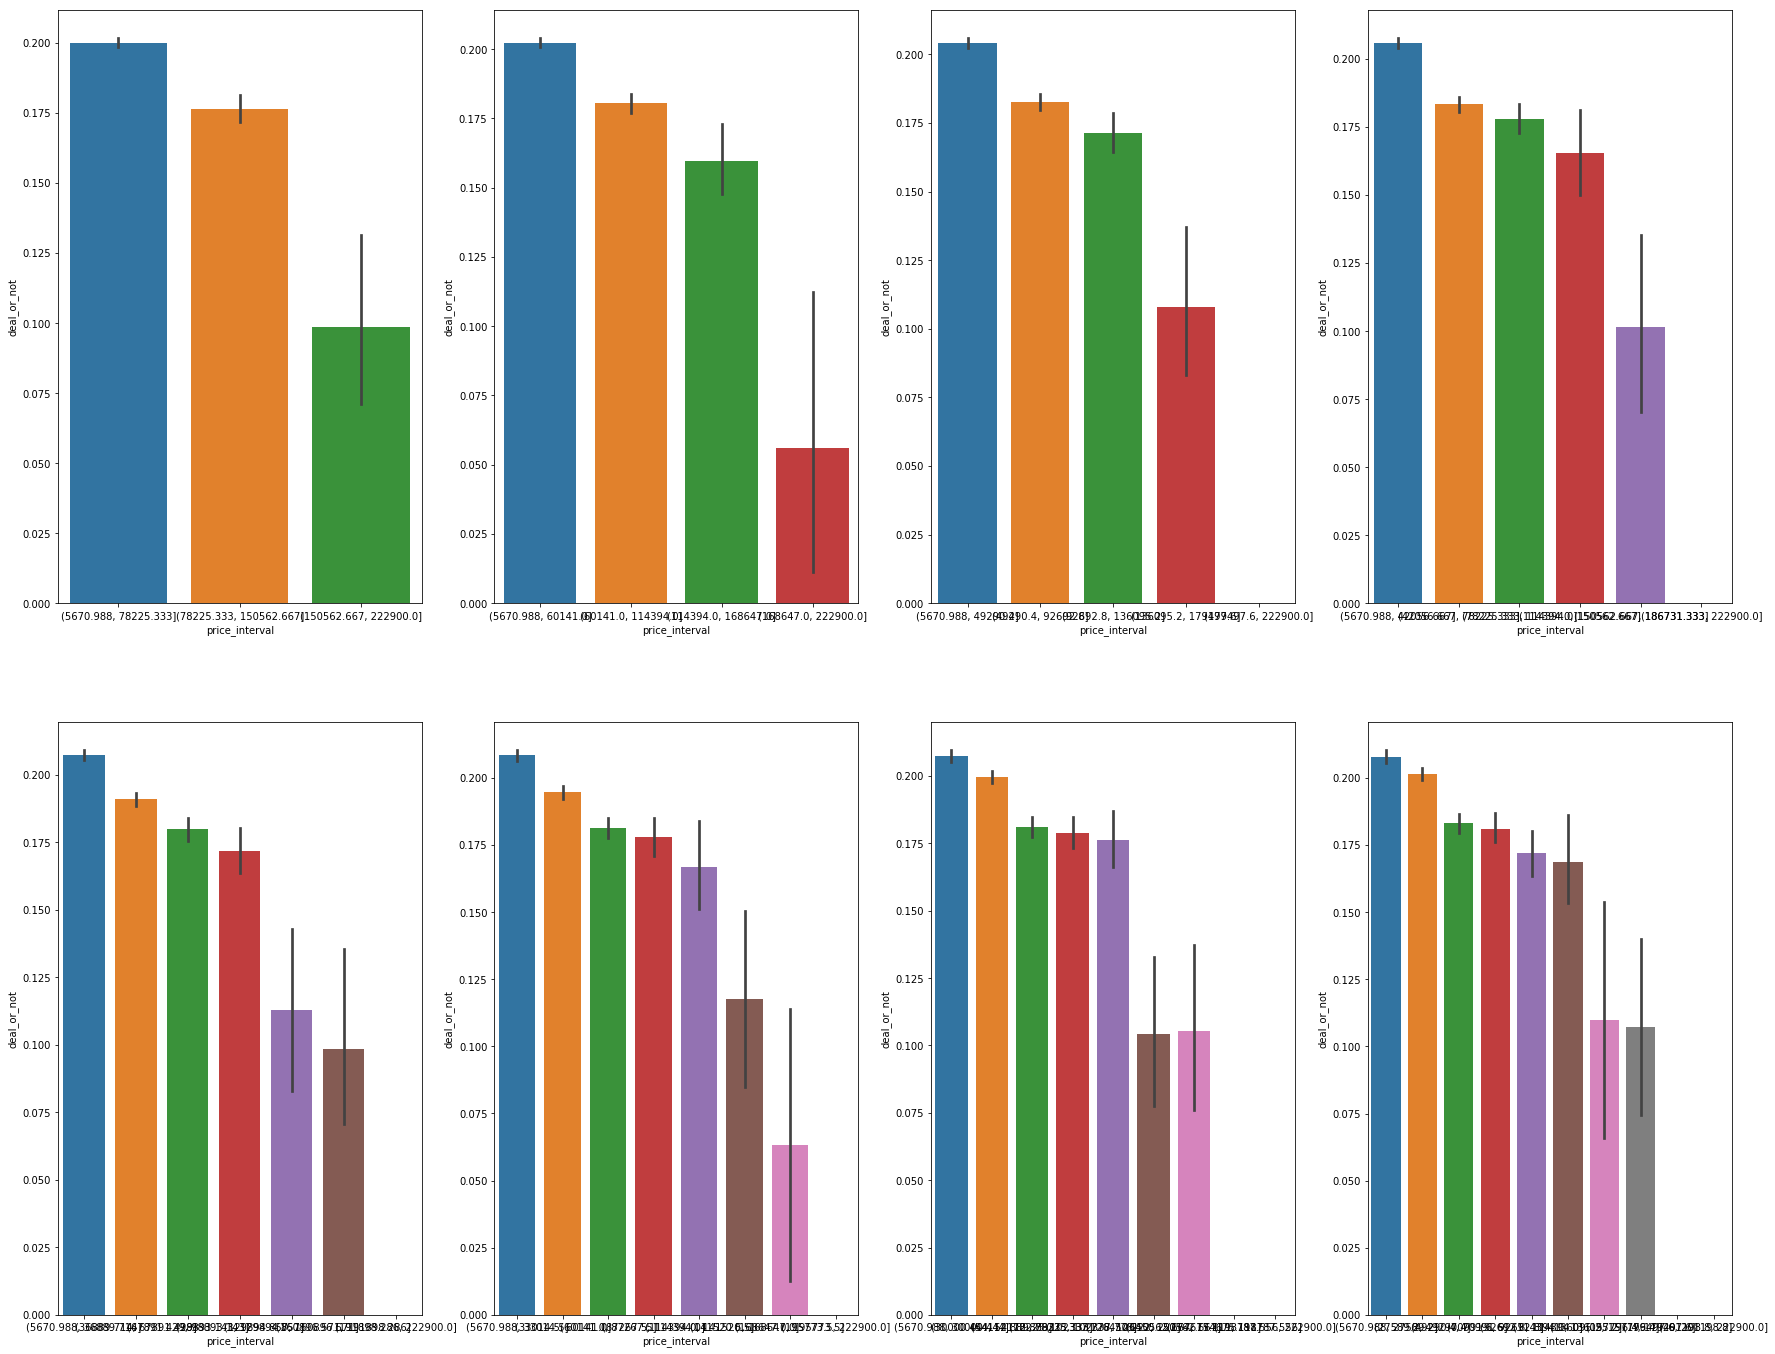

In [39]:
fig = plt.figure(figsize=(30,24))
for i in range(3,11):
    i = i-2
    fig.add_subplot(2,4,i)
    i = i+2
    train['price_interval'] = pd.cut(train['price'], bins= i)
    sns.barplot(data = train, x = 'price_interval', y = 'deal_or_not')

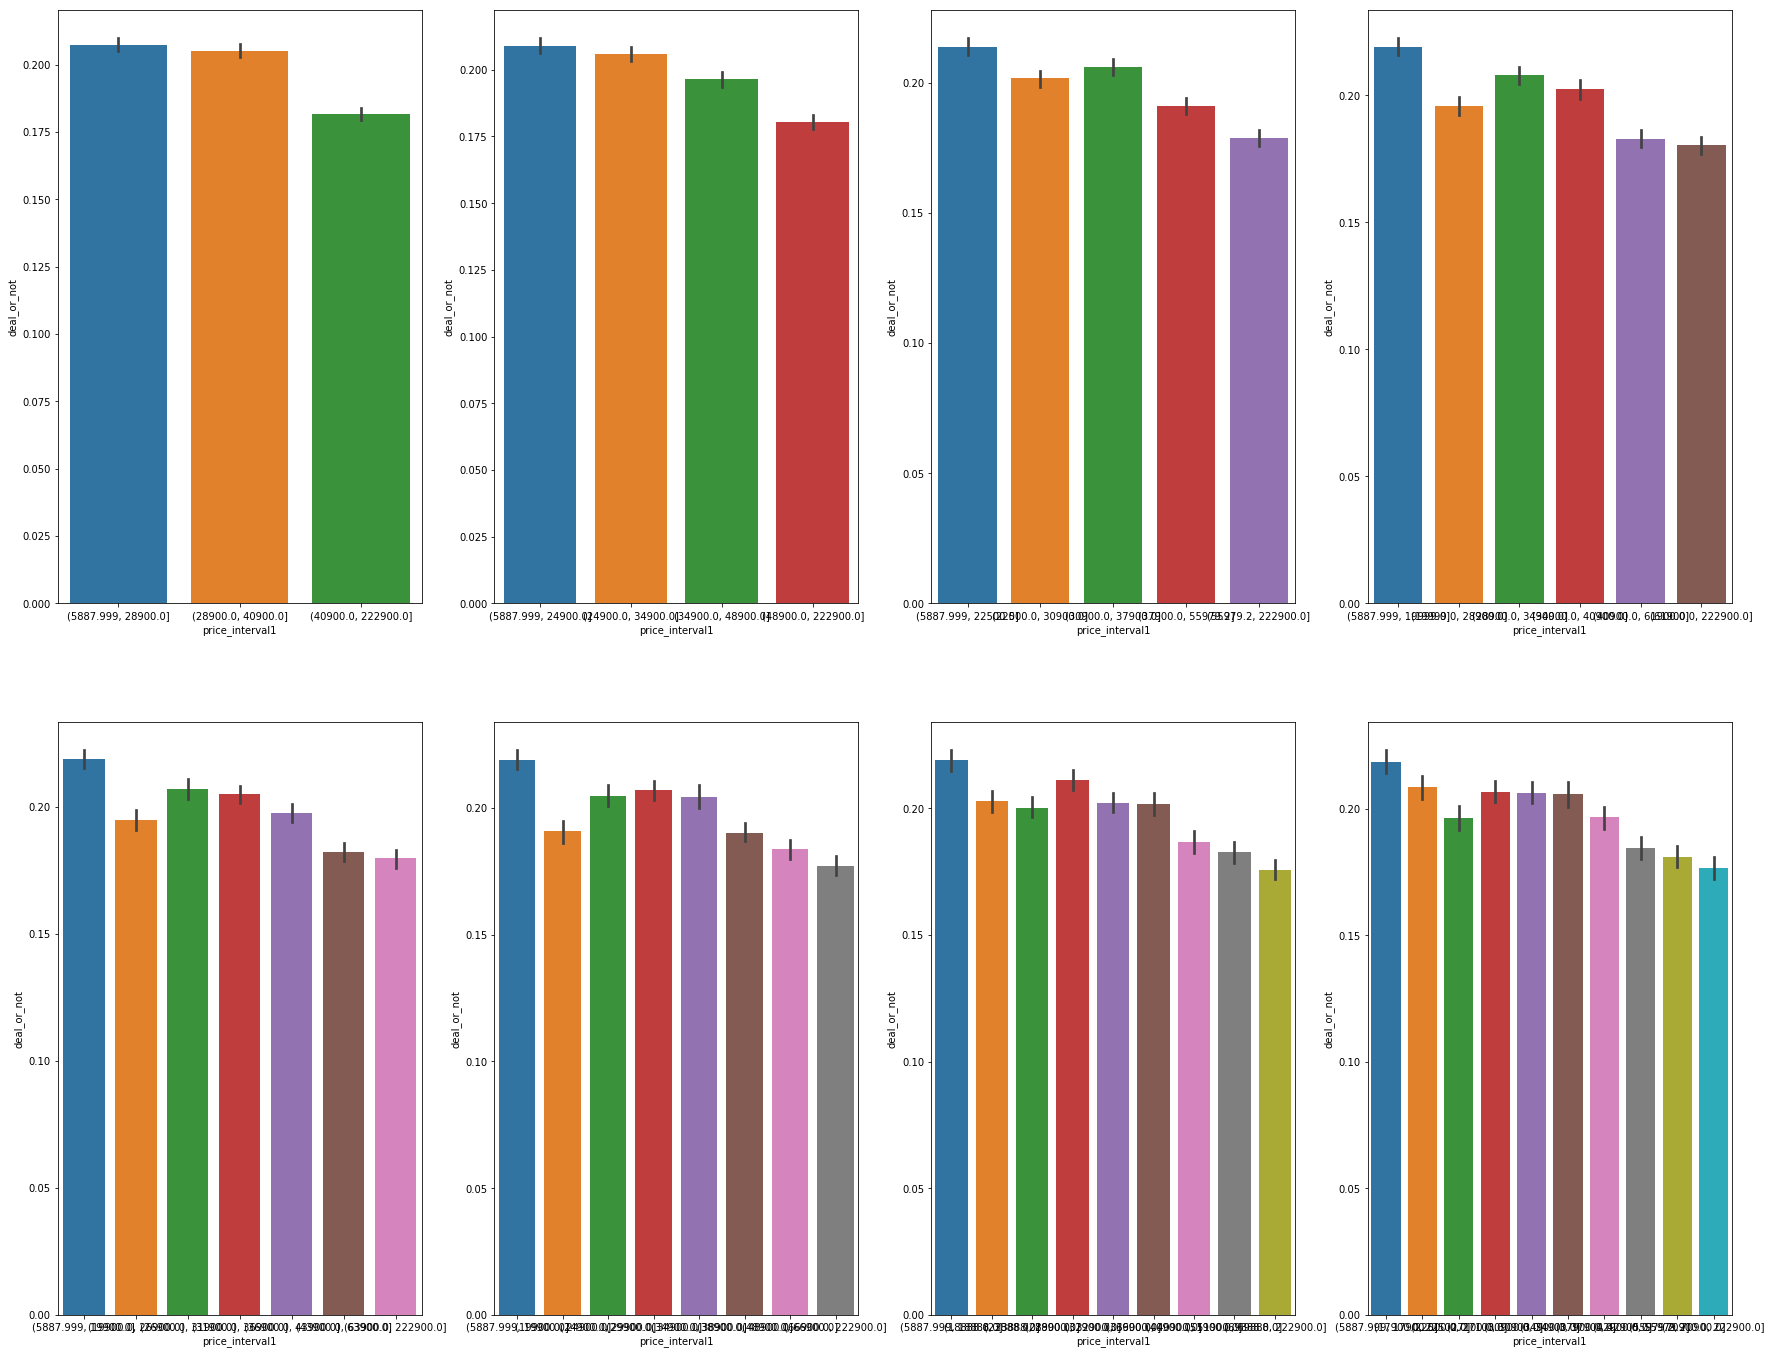

In [40]:
fig = plt.figure(figsize=(30,24))
for i in range(3,11):
    i = i-2
    fig.add_subplot(2,4,i)
    i = i+2
    train['price_interval1'] = pd.qcut(train['price'], q = i)
    sns.barplot(data = train, x = 'price_interval1', y = 'deal_or_not')

In [41]:
len(data)

297020

sub_line
subline_value_1     0.191489
subline_value_10    0.171887
subline_value_11    0.208672
subline_value_12    0.213858
subline_value_13    0.182079
subline_value_14    0.163569
subline_value_15    0.183812
subline_value_16    0.205882
subline_value_17    0.182314
subline_value_18    0.193512
subline_value_19    0.164456
subline_value_2     0.167899
subline_value_20    0.241567
subline_value_21    0.202785
subline_value_22    0.201427
subline_value_23    0.000000
subline_value_3     0.600000
subline_value_4     0.170132
subline_value_5     0.207627
subline_value_6     0.205645
subline_value_7     0.168623
subline_value_8     0.157424
subline_value_9     0.175859
Name: deal_or_not, dtype: float64

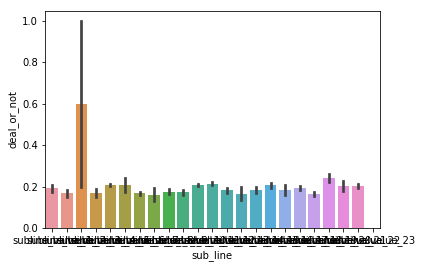

In [42]:
g = sns.barplot(data = data, x = 'sub_line', y = 'deal_or_not')
data.groupby(['sub_line'])['deal_or_not'].mean()

area
area_value_1      0.294118
area_value_10     0.168704
area_value_100    0.221500
area_value_101    0.220018
area_value_102    0.183333
area_value_103    0.000000
area_value_104    0.000000
area_value_105    0.302356
area_value_106    0.240575
area_value_107    0.191278
area_value_108    0.198538
area_value_109    0.205556
area_value_11     0.177236
area_value_110    0.221130
area_value_111    0.183315
area_value_112    0.000000
area_value_113    0.194391
area_value_114    0.179704
area_value_115    0.197998
area_value_116    0.141732
area_value_117    0.182461
area_value_118    0.166188
area_value_119    0.145078
area_value_12     0.031250
area_value_120    0.066143
area_value_121    0.000000
area_value_122    0.068966
area_value_123    0.148649
area_value_124    0.320000
area_value_125    0.000000
                    ...   
area_value_72     0.174510
area_value_73     0.187500
area_value_74     0.153061
area_value_75     0.052632
area_value_76          NaN
area_value_77     0.000

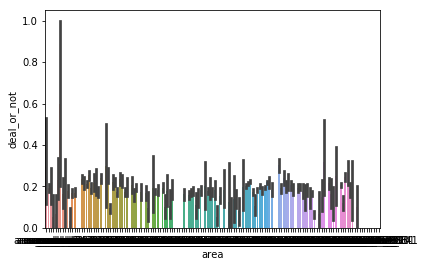

In [43]:
g = sns.barplot(data = data, x = 'area', y = 'deal_or_not')
data.groupby(['area'])['deal_or_not'].mean()

In [44]:
country = {
    'HNL 檀香山機場'   :    '美國夏威夷'      ,   
    'TPE 桃園機場'   :   '台灣'       ,  
    'LAX 洛杉機機場'   :  '美國'        ,
    'SFO 舊金山機場'   :   '美國'    ,
    'SEA 西雅圖機場'   :   '美國'       ,
    'ORD 芝加哥歐海爾機場'   :  '美國'        ,
    'ANC 安克拉治機場'   :   '美國'       ,
    'FAI 費爾班機場'   :   '美國' ,
    'AKL 奧克蘭機場'   :   '紐西蘭'       ,
    'SYD 雪梨機場'   :   '澳洲'       ,
    'CHC 基督城機場'   :   '紐西蘭'       ,
    'YYZ 多倫多機場'   :    '美國'      ,
    'JFK 紐約甘乃迪機場'   :   '美國'  ,
    'IAH 休士頓機場'   :    '美國'   ,
    'HKG 香港機場'   :    '香港'      ,
    'EWR 紐約紐華克機場'   :  '美國'        ,
    'BZN 波茲曼機場'   :   '美國'      ,
    'KHH 高雄機場'   :  '台灣'        ,
    'DEN 丹佛機場'   :    '美國'    ,
    'YVR 溫哥華機場'   :    '加拿大'   ,
    'PEK 北京首都機場'   :  '中國'        ,
    'TSN 天津濱海機場'   :  '中國'        ,
    'TSA 台北松山機場'   :  '台灣'    ,
    'SJW 石家莊正定機場'   :   '中國'       ,
    'WUH 武漢天河機場'   :  '中國'     ,
    'CKG 重慶江北機場'   :    '中國'      ,
    'PVG 上海浦東機場'   :     '中國'     ,
    'HGH 杭州蕭山機場'   :    '中國'      ,
    'NGB 寧波櫟社機場'   :     '中國'     ,
    'CAN 廣州白雲機場'   :    '中國'      ,
    'WUX 無鍚機場'   :      '中國'    ,
    'NKG 南京祿口機場'   :   '中國'       ,
    'WNZ 溫州龍灣國際機場' :  '中國'        ,
    'SHA 上海虹橋機場'   :    '中國'      ,
    'YNZ 鹽城南洋機場'   :     '中國'     ,
    'YTY 揚州泰州機場'   :     '中國'     ,
    'XIY 西安咸陽機場'   :    '中國'      ,
    'CGO 鄭州新鄭機場'   :     '中國'     ,
    'TYN 太原武宿機場'   :     '中國'     ,
    'XUZ 徐州觀音機場'   :     '中國'     ,
    'KHN 南昌昌北機場'   :     '中國'     ,
    'FOC 福州長樂機場'   :      '中國'    ,
    'HET 呼和浩特白塔機場'   :    '中國'      ,
    'HRB 哈爾濱太平機場'   :    '中國'      ,
    'INC 銀川河東機場'   :    '中國'      ,
    'TXN 黃山屯溪機場'   :    '中國'      ,
    'HFE 合肥新橋機場'   :    '中國'      ,
    'NNG 南寧吳墟機場'   :    '中國'     ,
    'KWL 桂林兩江機場'   :    '中國'     ,
    'CTU 成都雙流機場'   :    '中國'      ,
    'LXA 拉薩貢嘎機場'   :    '中國'      ,
    'XMN 廈門高崎機場'   :    '中國'      ,
    'MFM 澳門機場'   :      '澳門'   ,
    'SYX 三亞鳳凰機場'   :    '中國'      ,
    'HAK 海口美蘭機場'   :     '中國'     ,
    'KWE 貴陽龍洞堡機場'   :   '中國'       ,
    'KMG 昆明長水機場'   :    '中國'      ,
    'CGQ 長春龍嘉機場'   :     '中國'     ,
    'SHE 瀋陽桃仙機場'   :     '中國'     ,
    'DLC 大連機場'   :      '中國'    ,
    'TNA 濟南遙牆機場'   :   '中國'       ,
    'TAO 青島流亭機場'   :    '中國'      ,
    'WEH 威海大水泊機場'   :    '中國'      ,
    'YNT 煙台蓬萊機場'   :      '中國'    ,
    'KNH 金門機場'   :   '台灣'       ,
    'LJG 麗江三義機場'   :    '中國'      ,
    'SZX 深圳寶安機場'   :     '中國'     ,
    'URC 烏魯木齊地窩鋪機場'   :   '中國'       ,
    'LHW 蘭州中川機場'   :     '中國'     ,
    'XNN 西寧曹家堡機場'   :    '中國'      ,
    'CSX 長沙黃花機場'   :      '中國'    ,
    'DYG 張家界機場'   :     '中國'     ,
    'VIE 維也納機場'   :     '奧地利'     ,
    'ZRH 蘇黎世機場'   :      '瑞士'    ,
    'FRA 法蘭克福機場'   :    '德國'      ,
    'LHR 倫敦希斯洛機場'   :    '英國'      ,
    'KEF 雷克雅維克機場'   :    '冰島'      ,
    'DXB 杜拜機場'   :    '阿拉伯聯合大公國'      ,
    'CPH 哥本哈根凱斯楚普機場'   :    '丹麥'      ,
    'ARN 斯德哥爾摩阿蘭達機場'   :     '瑞典'     ,
    'IST 伊斯坦堡阿塔圖克機場'   :    '土耳其'      ,
    'HEL 赫爾辛基機場'   :     '芬蘭'     ,
    'AMS 阿姆斯特丹機場'   :   '芬蘭'       ,
    'DBV 杜布洛尼克機場'   :     '克羅埃西亞'     ,
    'SVO 莫斯科謝列梅捷沃機場'   :    '俄羅斯'      ,
    'LED 聖彼得堡機場'   :    '俄羅斯'      ,
    'VNO 維爾紐斯機場'   :    '立陶宛'      ,
    'TIA 地拉那機場'   :    '阿爾巴尼亞'      ,
    'PRG 布拉格機場'   :     '捷克'     ,
    'BUD 布達佩斯機場'   :     '匈牙利'     ,
    'LJU 盧布爾雅那機場'   :    '斯洛維尼亞共和國'      ,
    'SOF 索菲亞機場'   :    '保加利亞'      ,
    'WAW 華沙機場'   :    '波蘭'      ,
    'ZAG 札格雷布機場'   :    '克羅地亞'      ,
    'KUN KAUNAS'   :     '立陶宛'     ,
    'DUS 杜塞道夫機場'   :    '德國'      ,
    'TGD 波德戈里察機場'   :   '蒙特內哥羅'       ,
    'BKK 曼谷蘇凡納布機場'   :    '泰國'      ,
    'CDG 巴黎戴高樂機場'   :    '法國'      ,
    'MXP 米蘭馬爾彭薩機場'   :    '義大利'      ,
    'FCO 羅馬達文西機場'   :    '義大利'      ,
    'VCE 威尼斯機場'   :    '義大利'      ,
    'NAP 拿波里機場'   :   '義大利'       ,
    'AUH 阿布達比機場'   :    '阿拉伯聯合大公國'      ,
    'LGW 倫敦蓋威克機場'   :    '英國'      ,
    'LIS 里斯本機場'   :     '葡萄牙'     ,
    'MAD 馬德里機場'   :    '西班牙'      ,
    'BCN 巴塞隆納機場'   :  '西班牙'        ,
    'CMN 卡薩布蘭卡機場'   :   '摩洛哥王國'       ,
    'AGP 馬拉加機場'   :   '西班牙'       ,
    'BRU 布魯塞爾機場'   :   '比利時'       ,
    'NCE 尼斯機場'   :    '法國'      ,
    'FUK 福岡機場'   :    '日本'      ,
    'KOJ 鹿兒島機場'   :   '日本'       ,
    'KMJ 熊本機場'   :    '日本'      ,
    'KMI 宮崎機場'   :     '日本'     ,
    'UBJ 山口宇部機場'   :    '日本'      ,
    'CTS 札幌新千歲機場'   :    '日本'      ,
    'HKD 函館機場'   :    '日本'      ,
    'OBO 帶廣機場'   :    '日本'      ,
    'HND 東京羽田機場'   :   '日本'       ,
    'AKJ 旭川機場'   :    '日本'      ,
    'ICN 首爾仁川機場'   :    '韓國'      ,
    'PUS 釜山金海機場'   :   '韓國'       ,
    'GMP 首爾金浦機場'   :  '韓國'        ,
    'CJU 濟州機場'   :    '韓國'      ,
    'TAE 大邱機場'   :     '韓國'     ,
    'CJJ 清州機場'   :    '韓國'     ,
    'OKA 沖繩機場'   :    '日本'      ,
    'KMQ 小松機場'   :    '日本'      ,
    'NGO 名古屋中部機場'   :  '日本'        ,
    'TOY 富山機場'   :    '日本'      ,
    'RMQ 台中機場'   :   '台灣'       ,
    'MMJ 松本機場'   :   '日本'       ,
    'SDJ 仙台機場'   :    '日本'      ,
    'KIJ 新潟機場'   :    '日本'      ,
    'AOJ 青森機場'   :     '日本'     ,
    'AXT 秋田機場'   :    '日本'      ,
    'HNA 花卷'   :     '日本'     ,
    'GAJ 山形機場'   :   '日本'       ,
    'NRT 東京成田機場'   :   '日本'       ,
    'FSZ 靜岡機場'   :    '日本'      ,
    'KIX 大阪關西機場'   :   '日本'        ,
    'TNN 台南機場'   :     '台灣'     ,
    'TAK 高松機場'   :    '日本'      ,
    'HIJ 廣島機場'   :    '日本'      ,
    'OKJ 岡山機場'   :    '日本'      ,
    'IZO 出雲'   :    '日本'      ,
    'MYJ 愛媛松山機場'   :   '日本'       ,
    'CEB 宿霧機場'   :    '菲律賓'      ,
    'KLO 卡里博機場'   :   '菲律賓'       ,
    'MNL 馬尼拉機場'   :    '菲律賓'      ,
    'PPS 公主港機場'   :   '菲律賓'       ,
    'BNE 布里斯班機場'   :   '澳洲'       ,
    'MEL 墨爾本機場'   :     '澳洲'     ,
    'OOL 黃金海岸機場'   :  '澳洲'        ,
    'CNS 凱恩斯機場'   :    '澳洲'      ,
    'DPS 峇里島機場'   :   '印尼'       ,
    'CGK 雅加達機場'   :   '印尼'       ,
    'PNH 金邊機場'   :    '柬埔寨'      ,
    'REP 暹粒吳哥機場'   :   '柬埔寨'       ,
    'BKI 亞庇機場'   :   '馬來西亞'       ,
    'KUL 吉隆坡機場'   :   '馬來西亞'       ,
    'PEN 檳城機場'   :    '馬來西亞'      ,
    'SIN 新加坡機場'   :   '新加坡'       ,
    'LBU 拉布安機場'   :    '印尼'      ,
    'HKT 普吉機場'   :   '泰國'       ,
    'CNX 清邁機場'   :    '泰國'      ,
    'DMK 曼谷廊曼機場'   :   '泰國'       ,
    'HAN 河內機場'   :     '越南'     ,
    'DAD 峴港機場'   :      '越南'    ,
    'SGN 胡志明市新山機場'   :   '越南'       ,
    'JNB 約翰尼斯堡機場'   :       '南非'   ,
    'CPT 開普敦機場'   :     '南非'      ,
    'DOH 杜哈機場'   :      '卡達爾'    ,
    'KTM 加德滿都機場'   :   '尼泊爾'       ,
    'DEL 德里機場'   :      '印度'    ,
    'CMB 可倫坡機場'   :    '斯里蘭卡'      ,
    'VNS 瓦那那西機場'   :     '印度'     ,
    'HJR 卡修拉荷機場'   :     '印度'     ,
    'SXR 斯里那加機場'   :'查謨-克什米爾邦',
    'JAI 捷普機場'   :  '印度'   ,
    'CAI 開羅機場' :  '埃及'    ,
    'AMM 安曼機場'  :  '約旦'        ,
    'ESB 安卡拉埃森博阿機場'   :   '土耳其'     ,
    'LXR 路克索機場'   :   '埃及'    ,
    'TLV 特拉維夫本古里安機場'   :  '以色列'    ,
    'IKA 德黑蘭機場'   :  '伊朗'    ,
    'ASR 開塞利機場'   :    '土耳其'      ,
    'ATH 雅典機場'   :     '希臘'     ,
    'SKG 塞薩洛尼基機場'   :   '希臘'  ,
    'ADB 伊茲米爾機場'   :  '土耳其'      ,
    'TAS 塔什干機場'  :     '烏茲別克'
}           

In [45]:
test.groupby(['group_id'])['group_id'].count()[test.groupby(['group_id'])['group_id'].count() == 3].index

Int64Index([   43,    83,   113,   122,   240,   260,   285,   379,   380,
              624,
            ...
            67772, 67817, 67818, 67972, 68264, 68283, 68512, 68530, 68557,
            68562],
           dtype='int64', name='group_id', length=1321)

In [46]:
test.groupby(['group_id'])['group_id'].count()[test.groupby(['group_id'])['group_id'].count() > 2].sum()

140367

In [47]:
new_airline = airline[airline['go_back'] == '去程'].groupby(['group_id']).last()


In [48]:
new_airline['dst_area'] = new_airline['dst_airport'].map(country)

In [49]:
len(new_airline[new_airline['dst_area'].notnull()])

34952

In [50]:
new_airline.reset_index(inplace = True)

In [51]:
data = pd.merge(data, new_airline, on ='group_id', how = 'left')

In [52]:
len(data)

297020

In [53]:
complement_country = {
    '美國'   : '22642、11658、34545、56406 、33498',
    '荷蘭'   : '1841、10295、18377、27923、30258',
    '西班牙' : '6442、26197、19644、46437、14274、31239',
    '德國'   : '17678、26701、9333',
    '加拿大' : '64367、66087 、3174、17315、22058',
    '澳門'   : '66928、25659、10859、11259、14274、46447、52691',
    '澳洲'   : '1943、48363、18599、34842、63563',
    '越南'   : '9279、27519、28866',
    '義大利' : '12766',
    '伊朗'   : '20820',
    '阿拉伯聯合大公國' : '31187、63287',
    '中國'   : '32854、33796、45333、58725、4269、14650',
    '土耳其' : '1226、21364',
    '印度'   : '23456',
    '日本'   : '2493、35746',
    '以色列' : '47457',
    '新加坡' : '64790',
    '北歐'   : '58426',
    '南非'   : '53019',
    '香港'   : '65590',
    '約旦'   : '68311'
}

In [54]:
for i,k in complement_country.items():
    for j in k.split('、'):
        j = int(j)
        data.loc[data['group_id'] == j,'dst_area'] = i

In [55]:

data['new_dst_airport'] = data['dst_airport'].map(country)

In [56]:
data.loc[data['group_id'] == 68311]

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,deal_or_not,sub_line,area,...,fly_time,src_airport,arrive_time,dst_airport,time_interval1,time_interval2,take_off_time,land_time,dst_area,new_dst_airport
143143,42873,68311,16-May-17,src1_value_1,src2_value_1,unit_value_50,5,0.0,subline_value_22,area_value_135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,約旦,NaN
143144,182328,68311,2-Jun-17,src1_value_1,src2_value_1,unit_value_62,2,0.0,subline_value_22,area_value_135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,約旦,NaN
143145,303253,68311,16-May-17,src1_value_1,src2_value_1,unit_value_1,2,0.0,subline_value_22,area_value_135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,約旦,NaN


In [99]:
data['dst_area'].str.strip()

0         美國夏威夷
1         美國夏威夷
2         美國夏威夷
3         美國夏威夷
4         美國夏威夷
5         美國夏威夷
6         美國夏威夷
7         美國夏威夷
8         美國夏威夷
9         美國夏威夷
10        美國夏威夷
11        美國夏威夷
12        美國夏威夷
13        美國夏威夷
14        美國夏威夷
15        美國夏威夷
16        美國夏威夷
17           美國
18           美國
19           美國
20           美國
21           美國
22           美國
23           美國
24           美國
25           美國
26           美國
27           美國
28           美國
29           美國
          ...  
296990      土耳其
296991      土耳其
296992      土耳其
296993      土耳其
296994      土耳其
296995      土耳其
296996      土耳其
296997      土耳其
296998      土耳其
296999      土耳其
297000      土耳其
297001      土耳其
297002      土耳其
297003      土耳其
297004      土耳其
297005      土耳其
297006      土耳其
297007      土耳其
297008      土耳其
297009      NaN
297010      NaN
297011     烏茲別克
297012     烏茲別克
297013     烏茲別克
297014     烏茲別克
297015     烏茲別克
297016     烏茲別克
297017     烏茲別克
297018     烏茲別克
297019     烏茲別克
Name: dst_area, Length: 

In [100]:
len(data)

297020

In [101]:
data['dst_state'] = data['dst_area'].map(country_area)

In [102]:
data['dst_state'].unique()

array(['夏威夷', '美國', nan, '大洋洲', '香港', '加拿大', '中國', '台灣', '澳門', '西歐', '歐洲',
       '北歐', '中東', '東歐', '捷克', '南歐', '俄羅斯', '非洲', '日本', '韓國', '東南亞',
       '新加坡', '中亞'], dtype=object)

In [112]:
data[data['dst_state'] == '台灣'].groupby(['group_id']).first().index

Int64Index([ 1185,  1831,  2155,  3103,  5114, 12858, 14022, 16344, 23282,
            25155, 25765, 29299, 30361, 33878, 40535, 41398, 46149, 47180,
            48124, 49307, 49801, 50154, 53828, 53889, 57939, 58810, 59113,
            60100, 61021, 64218, 64395, 67915],
           dtype='int64', name='group_id')

In [147]:
airline[airline['group_id'] == 67915]

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport,time_interval1,time_interval2,take_off_time,land_time
61264,67915,去程,2017/2/24 14:10,TPE 桃園機場,2017/2/24 18:55,SIN 新加坡機場,14:10,18:55,afternoon,afternoon
61265,67915,去程,2017/3/1 18:25,SIN 新加坡機場,2017/3/1 22:40,KHH 高雄機場,18:25,22:40,afternoon,night


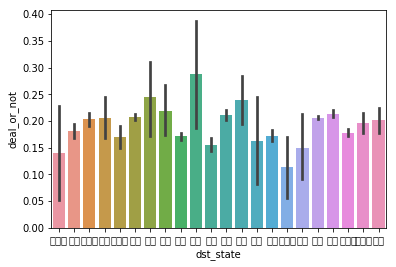

In [103]:
sns.barplot(data = data, x = 'dst_state', y = 'deal_or_not')

In [89]:
country_area = {
'中國' :'中國' ,
'丹麥' :'歐洲' ,
'以色列':'中東' ,
'伊朗':'中東' ,
'俄羅斯' :'俄羅斯' ,
'保加利亞' :'東歐' ,
'克羅地亞' :'南歐' ,
'克羅埃西亞':'南歐' ,
'冰島' :'北歐' ,
'加拿大':'加拿大' ,
'匈牙利':'東歐',
'北歐' :'北歐' ,
'南非' :'非洲' ,
'印尼' :'東南亞' ,
'印度' :'中亞' ,
'台灣' :'台灣' ,
'土耳其' :'中東' ,
'埃及' :'中東' ,
'奧地利' :'西歐' ,
'尼泊爾' :'中亞' ,
'希臘' :'南歐' ,
'德國' :'西歐' ,
'捷克' :'捷克' ,
'摩洛哥王國' :'非洲' ,
'斯洛維尼亞共和國' :'南歐' ,
'斯里蘭卡' :'中亞' ,
'新加坡' : '新加坡' ,
'日本': '日本',
'查謨-克什米爾邦' :'中亞' ,
'柬埔寨' :'東南亞' ,
'比利時':'北歐' ,
'法國' :'西歐' ,
'波蘭':'北歐' ,
'泰國':'東南亞' ,
'澳洲':'大洋洲',
'澳門' :'澳門' ,
'烏茲別克':'中亞' ,
'瑞典' :'北歐' ,
'瑞士' :'西歐' ,
'立陶宛' :'北歐' ,
'約旦' :'中東' ,
'紐西蘭' :'大洋洲' ,
'美國' :'美國' ,
'美國夏威夷' :'夏威夷' ,
'義大利' :'南歐' ,
'芬蘭' :'北歐' ,
'英國' :'西歐' ,
'荷蘭' :'西歐' ,
'菲律賓':'東南亞' ,
'葡萄牙':'南歐' ,
'蒙特內哥羅':'南歐' ,
'西班牙' :'南歐' ,
'越南' :'東南亞' ,
'阿拉伯聯合大公國':'中東' ,
'阿爾巴尼亞':'東歐' ,
'韓國':'韓國' ,
'香港' :'香港' ,
'馬來西亞' :'東南亞' ,
}

dst_area
中國          0.207674
丹麥          0.287500
以色列         0.220183
伊朗          0.000000
俄羅斯         0.113208
保加利亞        0.000000
克羅地亞        0.000000
克羅埃西亞       0.210332
冰島          0.187500
加拿大         0.170580
匈牙利         0.241935
北歐               NaN
南非          0.068966
印尼          0.185535
印度          0.213740
台灣          0.244604
土耳其         0.205226
埃及          0.247079
奧地利         0.171227
尼泊爾         0.138889
希臘          0.182004
德國          0.172060
捷克          0.162791
摩洛哥王國       0.169643
斯洛維尼亞共和國    0.172662
斯里蘭卡        0.165217
新加坡         0.195860
日本          0.206313
查謨-克什米爾邦         NaN
柬埔寨         0.193283
比利時         0.125000
法國          0.171391
波蘭          0.000000
泰國          0.164536
澳洲          0.208004
澳門          0.218650
烏茲別克        0.000000
瑞典          0.157658
瑞士          0.195312
立陶宛         0.107692
約旦          0.261194
紐西蘭         0.166667
美國          0.181007
美國夏威夷       0.140351
義大利         0.169045
芬蘭          0.157205
英國          0.170401
荷蘭  

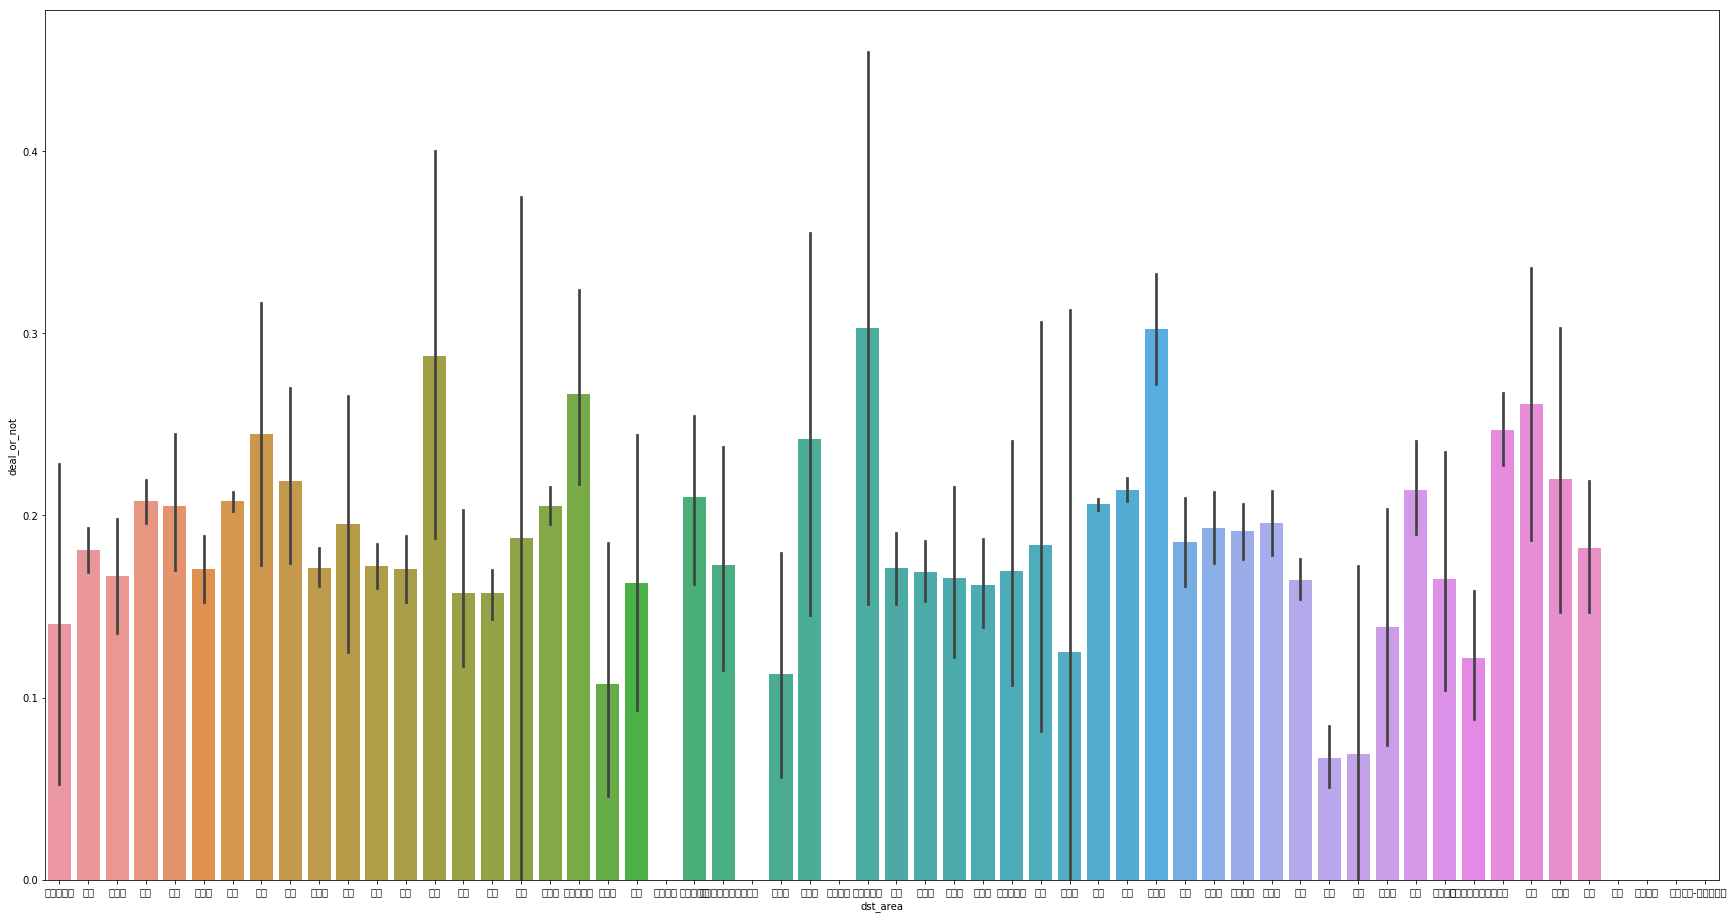

In [57]:
g = plt.figure(figsize=(30,16))
g = sns.barplot(data = data, x = 'dst_area', y = 'deal_or_not')
data.groupby(['dst_area'])['deal_or_not'].mean()

In [58]:
data.keys()

Index(['order_id', 'group_id', 'order_date', 'source_1', 'source_2', 'unit',
       'people_amount', 'deal_or_not', 'sub_line', 'area', 'days',
       'begin_date', 'price', 'product_name', 'promotion_prog', 'go_back',
       'fly_time', 'src_airport', 'arrive_time', 'dst_airport',
       'time_interval1', 'time_interval2', 'take_off_time', 'land_time',
       'dst_area', 'new_dst_airport'],
      dtype='object')

In [71]:
pd.to_datetime('19950901', format = '%Y%m%d')

Timestamp('1995-09-01 00:00:00')

In [77]:
from datetime import datetime
from workalendar.Taiwan import Taiwan

ModuleNotFoundError: No module named 'workalendar'

In [83]:
from datetime import datetime
from workalendar.europe import France

ModuleNotFoundError: No module named 'workalendar'

In [66]:
?pd.datetime

In [85]:
from pandas.tseries.holiday import 

ImportError: cannot import name 'TWFederalHolidayCalendar'